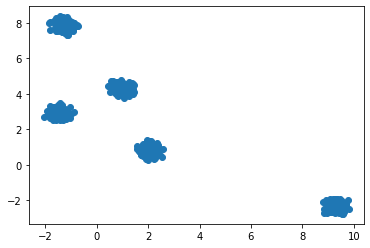

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import math as m
import statistics as st
X, _ = make_blobs(n_samples=1000, centers=5, n_features=2,cluster_std=0.2, random_state=0)
X,Y = X[:,0],X[:,1]
plt.scatter(X, Y)

In [2]:
class KMeans:
  def __init__(self, initC=0, X=[], Y=[]):
    self.x = X
    self.y = Y
    self.initC = initC
    self.clusters = []
    self.clusterPts = []
    self.newclusters =[]

  def fit_transform(self, X, Y):
    self.x = X
    self.y = Y

  def initCluster(self):
    for i in range(self.initC):
      self.clusters.append([round(self.x[i], 5), round(self.y[i], 5)])
      self.clusterPts.append([[1e-5], [1e-6]])
      self.newclusters.append([1e-3, 1e-1])

  def isSame(self):
    for i in range(self.initC):
      if self.clusters[i][0] != self.newclusters[i][0] or self.clusters[i][1] != self.newclusters[i][1]:
        return False
    return True

  def adjust(self):
    self.initCluster()
    while True:
      for i in range(self.x.shape[0]):
        Index = -1
        mini = float("inf")
        for j in range(self.initC):
          xc, yc = self.clusters[j]
          d = m.dist([xc, yc], [self.x[i], self.y[i]])
          if d < mini:
            mini = d
            Index = j
        self.clusterPts[Index][0].append(self.x[i])
        self.clusterPts[Index][1].append(self.y[i])
      for k in range(self.initC):
        self.newclusters[k] = [round(st.mean(self.clusterPts[k][0]), 5), round(st.mean(self.clusterPts[k][1]), 5)]
      if self.isSame():
        for _ in range(self.initC):
          self.clusters[_][0], self.clusters[_][1] = self.newclusters[_]
        break
      else:
        for _ in range(self.initC):
          self.clusters[_][0], self.clusters[_][1] = self.newclusters[_]
          self.newclusters[_] = [1e-3, 1e-1]
          self.clusterPts[_] = [[], []]

In [9]:
kmeans = KMeans(3)
kmeans.fit_transform(X, Y)
kmeans.adjust()

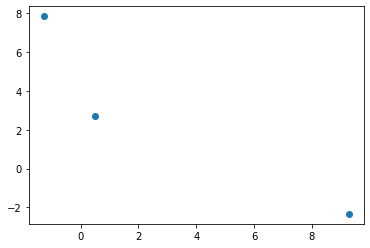

In [10]:
x = []
y = []
x1 = []
y1 = []
for i in range(kmeans.initC):
  x.append(kmeans.clusters[i][0])
  y.append(kmeans.clusters[i][1])
plt.scatter(x, y)

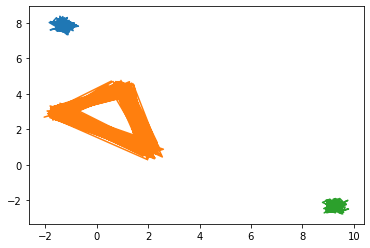

In [11]:
for i in range(kmeans.initC):
  x1 = kmeans.clusterPts[i][0]
  y1 = kmeans.clusterPts[i][1]
  plt.plot(x1, y1)